# Thermodynamic Cycles

We have discussed, briefly, the idea of gasses expanding and contracting and how to compute internal energy, work, and heat along different expansion/contraction paths.  Today we will discuss combining multiple steps into a cycle and computing internal energy, enthalpy, work and heat along this cycle.

## Learning goals:

After this lesson, you should be able to:
1. Descrine a four step thermodynamic cycle of an ideal gas
2. Compute $\Delta U$, $\Delta H$, $q$ and $w$ for a four step thermodynamic cycle of an ideal gas
3. Compute $\Delta U$, $\Delta H$, $q$ and $w$ for isochoric heating/cooling of an ideal gas
4. Indicate/plot a four step thermodynamic cycle on a PV diagram
5. Indicate the work extracted during a thermodynamic cycle in a PV diagram

## Coding Concepts

1. Variables
2. Plotting with matplotlib

## Example: A Car Engine

A car engine uses expansion of a gas to move pistons.  The piston is pushed up during the expansion of a gas due to the combustion of gasoline.  The piston must also return to the lowered position to be cycled again.  This is an example of a "cycle" and we wish to be able to compute the work (mechanical energy) provided by such a cycle.

<img src="gas_piston_cycle.jpeg" width="750" align="center">

## A PV Diagram

For Thermodynamic cycles of a gas, such as an ideal gas that we will consider today, the pressure ($P$), volume ($V$), and temperature ($T$) completely dictate everything about the gas.  As in, the ordered triplet $(V_1, P_1, T_1)$ represents a particular point in the state space of an ideal gas. It is common to use $P$ vs $V$ plots, or $PV$ diagrams, to represent Thermodynamic cycles of a gas.  

<IPython.core.display.Javascript object>


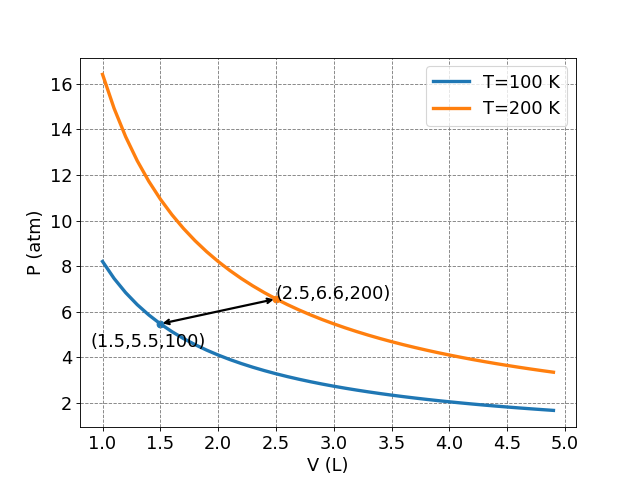

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

# variables for plot
n=1
R=0.08206
V=np.arange(1,5,0.1)
pUnit="atm"
vUnit="L"
T1=100
T2=200
fontsize = 16
xlabel = "V (" + vUnit + ")"
ylabel = "P (" + pUnit + ")"
# setup plot parameters
fig = plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(xlabel,size=fontsize)
ax.set_ylabel(ylabel,size=fontsize)
plt.tick_params(axis='both',labelsize=fontsize)
# plot isotherms
label = "T=" + str(T1)+" K"
ax.plot(V,n*R*T1/V,label=label,lw=3)
label = "T=" + str(T2)+" K"
ax.plot(V,n*R*T2/V,label=label,lw=3)
# add points
label = "(" + str(1.5) +","+ str(np.round(n*R*T1/1.5,decimals=1)) + "," +str(T1)+")"
plt.scatter(1.5,n*R*T1/1.5)
ax.annotate(label,xy=(0.9,n*R*T1/1.5-1),fontsize=fontsize)
label = "(" + str(2.5) +","+ str(np.round(n*R*T2/2.5,decimals=1)) + "," +str(T2)+")"
plt.scatter(2.5,n*R*T2/2.5)
ax.annotate(label,xy=(2.5,n*R*T2/2.5),fontsize=fontsize)
ax.annotate('',xy=(1.5,n*R*T1/1.5),xytext=(2.5,n*R*T2/2.5),arrowprops={'arrowstyle':"<->",'lw': 2, 'color': 'black'})
plt.legend(fontsize=fontsize)
plt.show()

## Cycles on a PV diagram

Two points are insufficient to extract work.  We need at least one intermediate point.  In fact, we will use two intermediate points.

In [4]:
def plot_PV_diagram(n=1,R=0.08206,V=np.arange(1,4,0.1),pUnit="atm",vUnit="L",T1=100,T2=200):
    fontsize = 16
    xlabel = "V (" + vUnit + ")"
    ylabel = "P (" + pUnit + ")"
    # setup plot parameters
    fig = plt.figure(figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
    ax.set_xlabel(xlabel,size=fontsize)
    ax.set_ylabel(ylabel,size=fontsize)
    plt.tick_params(axis='both',labelsize=fontsize)
    # plot isotherms
    label = "T$_1$=" + str(T1)+" K"
    ax.plot(V,n*R*T1/V,label=label,lw=4)
    label = "T$_2$=" + str(T2)+" K"
    ax.plot(V,n*R*T2/V,label=label,lw=4)
    # add point
    label = "(" + str(1.5) +","+ str(np.round(n*R*T1/1.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_1$,P$_1$,T$_1$)"
    ax.annotate(label,xy=(1.0,n*R*T1/1.5-1),fontsize=16)
    plt.scatter(1.5,n*R*T1/1.5,s=50,color="tab:blue")
    label = "(" + str(1.5) +","+ str(np.round(n*R*T2/1.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_1$,P$_2$,T$_2$)"
    plt.scatter(1.5,n*R*T2/1.5,s=50,color="tab:orange")
    ax.annotate(label,xy=(1.5+0.05,n*R*T2/1.5),fontsize=16)
    ax.annotate("A",xy=(1.35,n*R*T1/1.5+ 0.5*(n*R*T2/1.5-n*R*T1/1.5)),fontsize=24)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T2/2.5,decimals=1)) + "," +str(T2)+")"
    label = "(V$_2$,P$_3$,T$_2$)"
    plt.scatter(2.5,n*R*T2/2.5,s=50,color="tab:orange")
    ax.annotate(label,xy=(2.6,n*R*T2/2.5),fontsize=16)
    ax.annotate("B",xy=(2,n*R*T2/2+0.2),fontsize=24)
    label = "(" + str(2.5) +","+ str(np.round(n*R*T1/2.5,decimals=1)) + "," +str(T1)+")"
    label = "(V$_2$,P$_4$,T$_1$)"
    plt.scatter(2.5,n*R*T1/2.5,s=50,color="tab:blue")
    ax.annotate(label,xy=(2.6,n*R*T1/2.5),fontsize=16)
    ax.annotate("C",xy=(2.55,n*R*T1/2.5+ 0.4*(n*R*T2/2.5-n*R*T1/2.5)),fontsize=24)
    ax.annotate("D",xy=(2,n*R*T1/2-1.0),fontsize=24)
    ax.annotate('',xytext=(1.5,n*R*T1/1.5),xy=(1.5,n*R*T2/1.5),arrowprops={'arrowstyle':"-",'lw': 2, 'color': 'black'})
    ax.annotate('',xytext=(2.5,n*R*T1/2.5),xy=(2.5,n*R*T2/2.5),arrowprops={'arrowstyle':"-",'lw': 2, 'color': 'black'})
    ax.annotate('',xy=(2.5,5.0),xytext=(2.5,5.1),arrowprops={'arrowstyle': 'simple','lw': 2, 'color': 'black'})
    ax.annotate('',xy=(1.5,8.2),xytext=(1.5,8.1),arrowprops={'arrowstyle': 'simple','lw': 2, 'color': 'black'})
    vsub = np.arange(1.5,2.51,0.01)
    ax.plot(vsub,n*R*T1/vsub,lw=2,c="k")
    ax.plot(vsub,n*R*T2/vsub,lw=2,c="k")
    ax.fill_between(vsub,n*R*T1/vsub,n*R*T2/vsub,facecolor="green",alpha=0.5,interpolate=True)
    plt.legend(fontsize=16)
    plt.show()

<IPython.core.display.Javascript object>


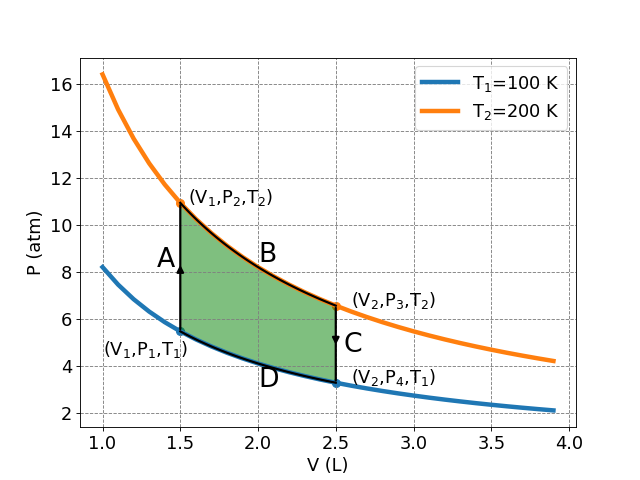

In [5]:
plot_PV_diagram()

There are four points and four processes on the above plot.  We will define them as:

$A$ : isochoric heating from $(V_1,P_1,T_1)$ to $(V_1,P_2,T_2)$

$B$ : isothermal expansion from $(V_1,P_2,T_2)$ to $(V_2,P_3,T_2)$

$C$ : isochoric cooling from $(V_2,P_3,T_2)$ to $(V_2,P_4,T_1)$

$D$ : isothermal contraction from $(V_2,P_4,T_1)$ to $(V_1,P_1,T_1)$

### Posing the problem

Compute $w$, $q$, $\Delta U$, and $\Delta H$ during each step of the cycle.  Compute the overall values as well.

We should not that $\Delta U$ and $\Delta H$ will be zero for the overall cycle since it starts and ends at the same point.  We still need to determine what these values are for each step along the cycle.

### $A$: Isochoric Heating

Compute $w_A$, $q_A$, $\Delta U_A$, and $\Delta H_A$ for isochoric heating starting from $(V_1,P_1,T_1)$ and ending at $(V_1,P_2,T_2)$.  

We can start with $\Delta U$ and $\Delta H$ for an ideal gas:

$\Delta U_A = C_V \Delta T = \frac{3}{2}nR(T_2-T_1)$

$\Delta H_A = C_P \Delta T = \frac{5}{2}nR(T_2-T_1)$

Now to compute $w$:

$w_A = -\int P_{ext}dV = 0$ 

since $dV = 0$.  The process is done isochorically so no change in volume.

Now to compute $q$:

$\Delta U_A = q_A + w_A$

$\Rightarrow C_V(T_2-T_1) = q_A$

### $B$: Isothermal Expansion

We want to compute $w_B$, $q_B$, $\Delta U_B$, and $\Delta H_B$ for a reversible isothermal expansion from $(V_1,P_2,T_2)$ to $(V_2,P_3,T_2)$.  We derived the equations for this last week so I will speed through it.  

For an isothermal expansion/contraction of an ideal gas from $(V_1,P_2,T_2)$ to $(V_2,P_3,T_2)$:

$\Delta U_B = 0$

$\Delta H_B = 0$

$w_B = nRT_2\ln\left(\frac{V_1}{V_2}\right)$

$q_B = nRT_2\ln\left(\frac{V_2}{V_1}\right)$

### $C$: Isochoric Cooling

Compute $w_C$, $q_C$, $\Delta U_C$, and $\Delta H_C$ for isochoric heating starting from $(V_2,P_3,T_2)$ and ending at $(V_2,P_4,T_1)$.  

Equations and results are very comparable to previous isochoric process but one must be careful that we are starting at $(V_2,P_3,T_2)$ and ending at $(V_2,P_4,T_1)$.  

$\Delta U_C = C_V \Delta T = \frac{3}{2}nR(T_1-T_2)$

$\Delta H_C = C_P \Delta T = \frac{5}{2}nR(T_1-T_2)$

$w_C = 0$

$q_C = \frac{3}{2}nR(T_1-T_2)$

### $D$: Isothermal Contraction

We want to compute $w_D$, $q_D$, $\Delta U_D$, and $\Delta H_D$ for a reversible isothermal expansion from $(V_2,P_4,T_1)$ to $(V_1,P_1,T_1)$.  

We will use the same equations as the isothermal expansion process but take care about the beginning and end points.

$\Delta U_D = 0$

$\Delta H_D = 0$

$w_D = nRT_1\ln\left(\frac{V_2}{V_1}\right)$

$q_D = nRT_1\ln\left(\frac{V_1}{V_2}\right)$

### Summary

| Process                    | $w$                            | $q$                 | $\Delta U$                 | $\Delta H$
| :------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- | :------------------------------------- |
| A - Isochoric Heating      | $0$                                    | $\frac{3}{2}nR(T_2-T_1)$ | $\frac{3}{2}nR(T_2-T_1)$ | $\frac{5}{2}nR(T_2-T_1)$
| B - Isothermal Expansion   | $nRT_2\ln\left(\frac{V_1}{V_2}\right)$ | $nRT_2\ln\left(\frac{V_2}{V_1}\right)$ | 0 | $0$
| C - Isochoric Cooling      | $0$                                    | $\frac{3}{2}nR(T_1-T_2)$ | $\frac{3}{2}nR(T_1-T_2)$ | $\frac{5}{2}nR(T_1-T_2)$
| D - Isothermal Contraction | $nRT_1\ln\left(\frac{V_2}{V_1}\right)$ | $nRT_1\ln\left(\frac{V_1}{V_2}\right)$ | $0$ | $0$

Totals:

$w_{total} = nRT_2\ln\left(\frac{V_1}{V_2}\right)  + nRT_1\ln\left(\frac{V_2}{V_1}\right) $

$ = nRT_2\ln\left(\frac{V_1}{V_2}\right)  - nRT_1\ln\left(\frac{V_1}{V_2}\right) $

$ = nR\ln\left(\frac{V_1}{V_2}\right)  (T_2-T_1)$

$q_{total} = nRT_2\ln\left(\frac{V_2}{V_1}\right)  + nRT_1\ln\left(\frac{V_1}{V_2}\right) $

$ = nRT_2\ln\left(\frac{V_2}{V_1}\right)  - nRT_1\ln\left(\frac{V_2}{V_1}\right) $

$ = nR\ln\left(\frac{V_2}{V_1}\right)  (T_2-T_1)$

$\Delta U_{total} = \frac{3}{2}nR(T_2-T_1) + \frac{3}{2}nR(T_1-T_2) =0 $

$\Delta H_{total} = \frac{5}{2}nR(T_2-T_1) + \frac{5}{2}nR(T_1-T_2) =0 $

